# Assaig de tracció

A un assaig de tracció, una proveta normalitzada amb una secció $s$ es somet a un força $F$ de tracció. La **tensió normal** o **esforç** $\sigma$ generat per la força $F$ a la secció $s$ té l'expressió: 

$$\sigma = \frac{F}{s}$$ 

Quan l'esforç en la proveta està per sota del **límit elàstic** ens trobem a la **zona elàstica** on es cumpleix la **llei de Hooke**

$$\sigma = E\epsilon$$

on $E$ és el **mòdul de Young** o **Mòdul elàstic** i  $\epsilon$ la deformació $\epsilon = \frac{\Delta L}{L_{0}}$

Si l'esforç supera el *límit elàstic* ens trobarem a la **zona plàstica**, on ja no es cumpleix la llei de Hooke i la deformació és permanent. Si continuem aplicant esforç a aquesta zona arribarem a un màxim, després d'ell ens costarà menys esforç deformar el material fins arribar a la tensió de ruptura on el material es trenca. 



Aquestes assatjos es realitzen amb instruments com el de la fotografia, on s'utilitzen provetes normalitzades del material a estudiar.



![](https://pythonforundergradengineers.com/code/matplotlib_plots/stress_strain_curves/images/instron.jpg)

Anem a estudiar un assaig amb un acer 4142 (trobareu diverses dades experimentals a https://github.com/ProfessorKazarinoff/staticsite/tree/master/content/code/matplotlib_plots i a https://pythonforundergradengineers.com/stress-strain-curve-with-python-and-matpotlib.html) 

In [ ]:
import numpy as np                        
import pandas as pd                       
import matplotlib.pyplot as plt           
import matplotlib.gridspec as gridspec    
import statistics as st                   
from scipy.stats import linregress        
from IPython.display import Markdown      


with open('data/Materials/acero_4142.npy', 'rb') as f:
    e = np.load(f)
    s = np.load(f)

e = e * 100    # treballarem amb la deformació en %

%matplotlib inline                               
plt.rcParams['figure.figsize'] = (16,7)           # determines the dimensions (size of the figure)
fig = plt.figure()
plt.plot(e, s)
plt.xlabel('$\epsilon$ [%]')
plt.ylabel('$\sigma$ [MPa]')
plt.title("Diagrama de tracció");

Si ens fixem en la zona elàstica, podrem fer una estimació del mòdul elàstic, agafant els punts que estan en línia recta

In [4]:
ms = linregress(e[35:102], s[35:102])
Es = ms[0]  
offset_acer = Es*(e - 0.2)
print("El Mòdul elàstic de l'acer 4142 és %d MPa" % Es )

El Mòdul elàstic de l'acer 4142 és 2022 MPa


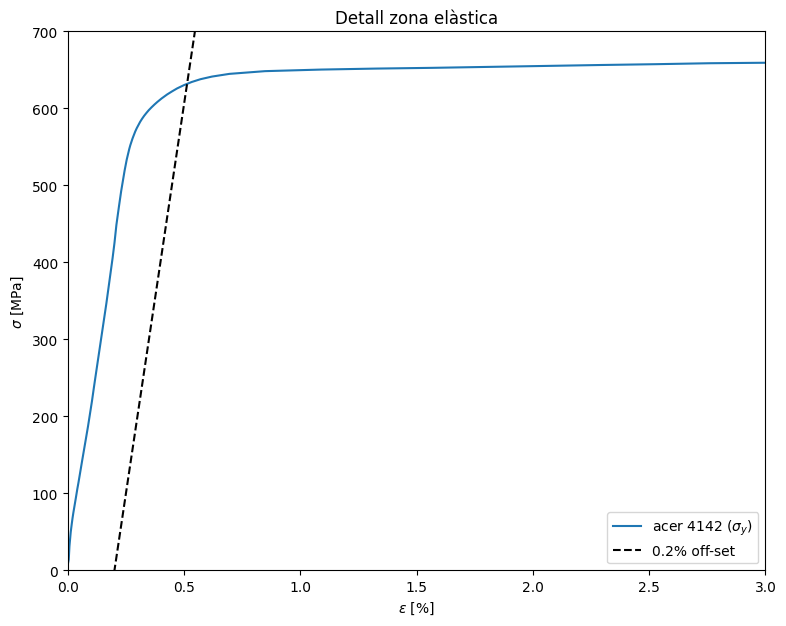

In [5]:
%matplotlib inline                                       
plt.rcParams['figure.figsize'] = (9,7)     
plt.plot(e, s)
plt.plot(e, offset_acer,'k--')
plt.xlabel('$\epsilon$ [%]')
plt.ylabel('$\sigma$ [MPa]')
plt.title("Detall zona elàstica")
plt.axis([0,3,0,700])
plt.legend(["acer 4142 ($\sigma_{y}$)","0.2% off-set"],loc='lower right');


Podeu observar que hem dibuixat una líne paral·lela a la del comportament elàstic desplaçada un 0,2 % a la dreta. Com és molt difícil saber on acaba la recta i comenza la zona no linial, s'agafa com a valor experimental del límit elàstc el punt de tall de la corba amb aquesta recta desplaçada.

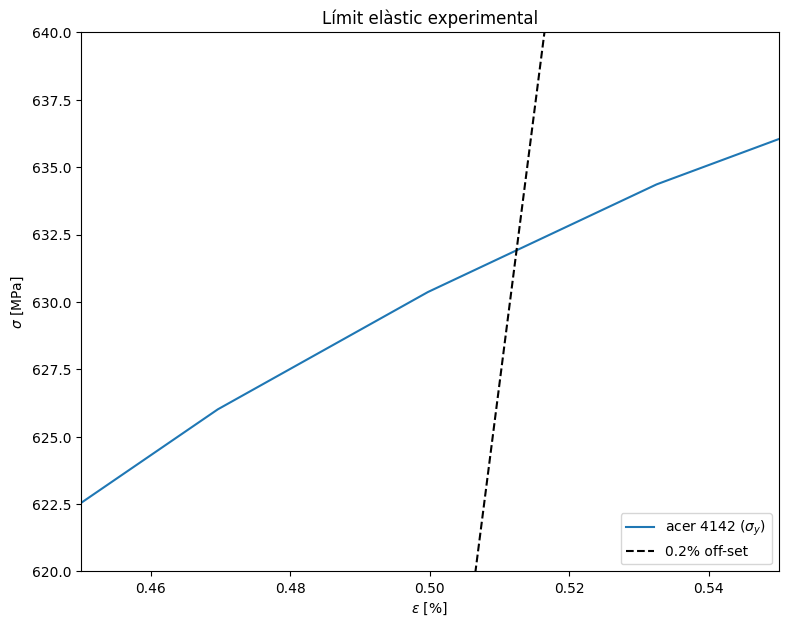

In [6]:
%matplotlib inline                             
plt.rcParams['figure.figsize'] = (9,7)     
plt.plot(e, s)
plt.plot(e, offset_acer,'k--')
plt.xlabel('$\epsilon$ [%]')
plt.ylabel('$\sigma$ [MPa]')
plt.title("Límit elàstic experimental")
plt.axis([0.45,0.55,620,640])
plt.legend(["acer 4142 ($\sigma_{y}$)","0.2% off-set"],loc='lower right');
#plt.savefig('acer_limit_elastic.png') 

podem veure que el punt de tall es troba al voltant dels  630 MPa

In [36]:
#import plotly.offline as pyo
#pyo.init_notebook_mode(connected=True)

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio


#pio.renderers.default = 'notebook'
#pio.renderers.default = 'jupyterlab'

#fig = px.scatter(x=e, y=s)
#fig = px.line(x=e, y=s, labels={'x':'$\epsilon [%]$', 'y':'$\sigma$$ [MPa]$'})
fig = go.Figure()
fig.add_trace(go.Scatter(x=e,y=s, mode='lines', name='real'))
fig.add_trace(go.Scatter(x=e,y=offset_acer, mode='lines', name='recta'))
fig.update_layout(
    xaxis_title=r'deformació [%]',
    yaxis_title=r'tensió [MPa]'
)
fig.update_xaxes(range=[0.51238, 0.51248])
fig.update_yaxes(range=[631.7, 632])
#fig.show("notebook") 
#fig.show("jupyterlab")
#fig.show(renderer="plotly_mimetype")
fig.write_html("assets/w3/diagtrac.html")

Amb aquest gràfic interactius podem precisar més fàcilment el punt de tall

In [37]:
%%html
 <iframe src="w3/diagtrac.html" width=600 height="500"></iframe> 

In [30]:
s_exp = 631.9
s_max = max(s)
print("L'acer 4142 té un límit elàstic de %.1f MPa i i una tensió màxima de %.1f MPa" %(s_exp, s_max))   

L'acer 4142 té un límit elàstic de 631.9 MPa i i una tensió màxima de 659.3 MPa


Una vegada que la proveta s'ha trencat a la tensió de ruptura, recupera la deormació elàstica. Per estimar la deformació plàstica que ens dona la ductibilitat del material caldrà restar la deformació elàstica amb una paral·lela a la recta elàstica. Podem fer una estimació amb aquest gràfic

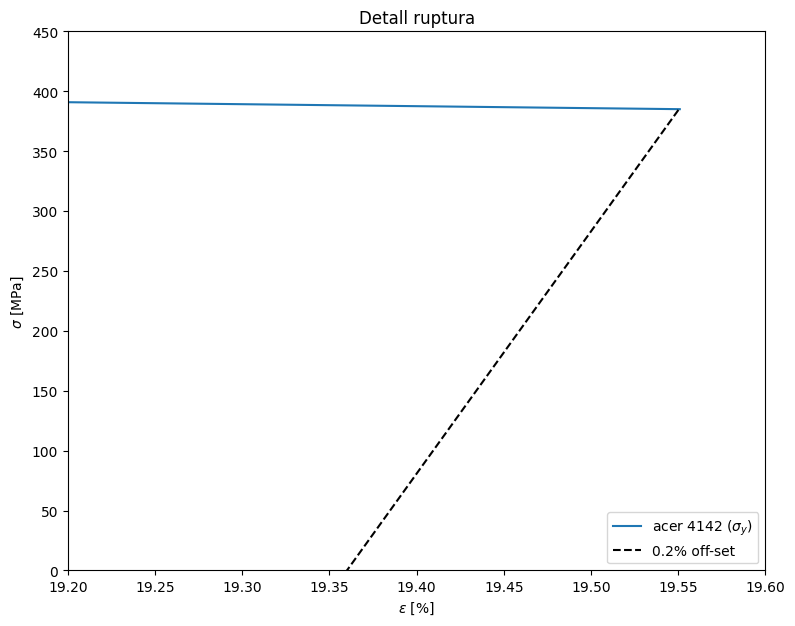

In [35]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(b):
    offset_acer2 = Es*(e - b)    
    plt.figure()
    plt.plot(e, s)
    plt.plot(e, offset_acer2,'k--')
    plt.xlabel('$\epsilon$ [%]')
    plt.ylabel('$\sigma$ [MPa]')
    plt.title("Detall ruptura")
    plt.axis([19.2,19.6,0,450])
    plt.legend(["acer 4142 ($\sigma_{y}$)","0.2% off-set"],loc='lower right');    
    plt.show()

#interactive_plot = interactive(f, b=(19.2,19.6, 0.02))
#output = interactive_plot.children[-1]
#interactive_plot
f(19.36)

Podeu comprobar fàcilment que la deformació plàstica és d'un 19,36 %